In [21]:
import os
import shutil
import csv
import pandas as pd
import sys
import numpy as np

#「入力エリア」csv.形式化したいフォルダーの番号の範囲を指定、解析のときに考慮したい項目をsample informationに従って記入
start=14
stop=22
analysis_method="Condition"

#「入力エリア」全てのフォルダーに共通する部分を指定
FolderHead = "Sample_"
FolderTail = "h"

#「入力エリア」salmonの結果とsample infomationが格納されているフォルダーと、新たなフォルダーの名前を決めて入力。Sample Infomationのファイル名も指定。
data_folder = "/Users/yujiokano/Desktop/Salmon2のコピー"
new_folder = "/Users/yujiokano/Desktop/" + "2020-07-30-RNAseqresults"
datasheet = "sampleInfo2.txt"

#フォルダを作成する
n=stop+1
new_dir_path = new_folder + "/csv"
assurance = os.path.exists(new_folder)
common_folder_path_S = data_folder +"/"+FolderHead
common_folder_path_P = new_dir_path+"/"+FolderHead
if assurance == False :
    os.makedirs(new_dir_path)
else :
    print("----Name for the new folder is already used. Are you sure to add new folders?----")
    ans=input("press y to proceed")
    if ans=="y":
        print("----Resuming the process----")
    else:
        sys.exit()

#sample infomationが指定されたフォルダーに格納されていることの確認
SamInf = data_folder + "/" + datasheet
assurance2 = os.path.exists(SamInf)
if assurance2 == False:
    print("---- No sample information was found in "+common_folder_path_S + str(i) + FolderTail +"----")
    sys.exit()
else:
    message = "----Sample information was confirmed in the folder----"
print(message)

#sf.形式をtxt.形式に変換してからcsv.に変換
for i in range(start, n):
    new_dir_path_2 = common_folder_path_P + str(i) + FolderTail
    os.mkdir(new_dir_path_2)
    filepath=common_folder_path_S+ str(i) + FolderTail + "/quant.genes.sf"
    authentic=filepath
    copy=new_dir_path_2 + "/quant.genes.sf"
    new_txt=new_dir_path_2 + "/quant.genes.txt"
    shutil.copyfile(authentic, copy)
    os.rename(copy, new_txt)
    txt_path=common_folder_path_P + str(i) + FolderTail +"/quant.genes.txt"
    def text_csv_converter(txt_path):
        file_csv = txt_path.replace("txt", "csv")
        with open(txt_path)as rf:
            with open(file_csv, "w")as wf:
                readfile = rf.readlines()
                for read_text in readfile:
                    read_text = read_text.split()
                    writer = csv.writer(wf, delimiter=',')
                    writer.writerow(read_text)
    if __name__ == '__main__':
        filename = common_folder_path_P + str(i) + FolderTail +"/quant.genes.txt"
        text_csv_converter(filename)
    os.remove(filename)
print("----File format conversion completed----")

#sample infomationの移動とcsv.化 
AuthInfo = data_folder+"/"+datasheet
CopyInfo = new_folder+"/"+datasheet
shutil.copyfile(AuthInfo, CopyInfo)
txt_path = CopyInfo
def text_csv_converter(txt_path):
    file_csv = txt_path.replace("txt", "csv")
    with open(txt_path)as rf:
        with open(file_csv, "w")as wf:
            readfile = rf.readlines()
            for read_text in readfile:
                read_text = read_text.split()
                writer = csv.writer(wf, delimiter=',')
                writer.writerow(read_text)
if __name__ == '__main__':
    filename = CopyInfo
    text_csv_converter(filename)
os.remove(filename)
print("----Sample information duplication completed----")

#各サンプルのcsv.ファイルを結合して、発現のない遺伝子については削除する
df = pd.read_csv(common_folder_path_P + str(14) + FolderTail +"/quant.genes.csv")
df = df.set_index('Name')
df=df.loc[:,['TPM']]
sample_name = pd.read_csv(new_folder+"/"+"sampleInfo2.csv")
l_columns = list(sample_name.columns)
autorization = analysis_method in l_columns
if autorization == True:
    sample_name =sample_name.loc[:,[analysis_method]]
    SampleName = sample_name.T
    l_name = list(sample_name[analysis_method])
    csv_value=start+1
    for i in range(csv_value, n):
        df2 = pd.read_csv(common_folder_path_P + str(i) + FolderTail +"/quant.genes.csv")
        df2 = df2.set_index('Name')
        df2=df2.loc[:,['TPM']]
        df[str(i)]=df2
    df.columns = l_name
else:
    print("----Unknown analysis method----")
    sys.exit()
dir_path=new_folder+"/integrated_results_"+analysis_method
assurance = os.path.exists(dir_path)
if assurance==True:
    print("----Integrated data were detected----")
else:
    os.mkdir(dir_path)
    dh=df.sum(axis=1)
    df["sum"]=dh
    df=df[df["sum"] > 1]
    df=df.drop(columns='sum')
    df=np.log2(df+1)
    df.to_csv(dir_path+"/gene_vs_sample.csv")
    dg=df.T
    dg.to_csv(dir_path+"/sample_vs_gene.csv")
print("----Data Integration completed----")

#各遺伝子の相関係数を算出（書き途中）
print("----Gene reduction is optional. Lower expression than average will be removed----")
will=input("press y to proceed")
if will=="y":
    dir_path2=new_folder+"/gene_reduction_log_"+analysis_method
    os.mkdir(dir_path2)


#発現の弱い遺伝子数の削減（書き直し必須）
print("----Gene reduction is optional. Lower expression than average will be removed----")
will=input("press y to proceed")
if will=="y":
    dir_path2=new_folder+"/gene_reduction_log_"+analysis_method
    os.mkdir(dir_path2)
    number=input("input num of processing")
    trial_number=number
    if trial_number.isdecimal():
        trial_number = int(trial_number)
        if trial_number > 0:
            trial_number = trial_number+1
            dh=df.sum(axis=1)
            di=df
            di["sum"]=dh
            dk=di["sum"]
            for i in range(1, trial_number):
                li = len(list(di.index))
                dj=np.array(dk)
                ave=dj.mean()
                di=di[di["sum"] > ave]
                di=di.drop(columns="sum")
                li2 = len(list(di.index))
                dj = pd.DataFrame([[str(i), ave, li, li2]])
                dj.columns=["process", "threshold", "num of genes before", "num of genes after"]
                di.to_csv(dir_path+"/"+analysis_method+"_reduced_gene_vs_sample_"+str(i)+".csv")
                dk=di.T
                dk.to_csv(dir_path+"/"+analysis_method+"_sample_vs_reduced_gene_"+str(i)+".csv")
                dj.to_csv(dir_path2+"/gene_reduction_log_"+str(i)+".csv") 
                dk=di.sum(axis=1)
                di["sum"]=dk
        else:
            print("----Gene reduction will be omitted----")
            sys.exit()
        dh=pd.read_csv(dir_path2+"/gene_reduction_log_1.csv")
        number = int(number)
        if number>=2:
            number=number+1
            for i in range(2, number):
                di=pd.read_csv(dir_path2+"/gene_reduction_log_"+str(i)+".csv")
                dh=dh.T
                di=di.T
                dh[str(i)]=di
                dh=dh.T
                os.remove(dir_path2+"/gene_reduction_log_"+str(i)+".csv")
        dh = dh.set_index("process")
        dh=dh.drop(columns=dh.columns[[0]])
        dh.to_csv(dir_path2+"/gene_reduction_log.csv") 
        os.remove(dir_path2+"/gene_reduction_log_1.csv")
        print("----Gene reduction completed----")
    else:
        print("----Gene reduction will be omitted----")
else:
    print("----Gene reduction omitted----")


----Sample information was confirmed in the folder----
----File format conversion completed----
----Sample information duplication completed----
----Data Integration completed----
----Gene reduction is optional. Lower expression than average will be removed----
press y to proceedg
----Gene reduction omitted----


press c to cancel 2D-PCA-Xmeansu
----2D-PCA-Xmeans----
select a csv. file to perform 2D-PCA-Xmeans/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv
input trial number3
select a folder to export results in/Users/yujiokano/Desktop/glioma_results/RNAseq_results
----A new folder has been created----
/Users/yujiokano/Desktop/glioma_results/RNAseq_results/2D-PCA-Xmeans_2020-08-03-1-33-44


/Users/yujiokano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yujiokano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/yujiokano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yuj

IndexError: list index out of range

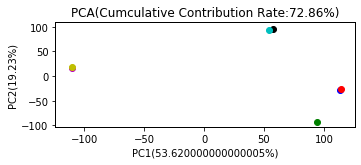

In [277]:
import os
import shutil
import csv
import pandas as pd
import sys
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pyclustering
from pyclustering.cluster import xmeans
import datetime

#プログラムの作動を確認
will=input("press c to cancel 2D-PCA-Xmeans")
if will=="c":
    print("----Process cancelled----")
    sys.exit()
else:
    print("----2D-PCA-Xmeans----")

#ファイルと回数の指定
df=pd.read_csv(input("select a csv. file to perform 2D-PCA-Xmeans"))
trial = input("input trial number")
if trial.isdecimal():
    trial = int(trial)
else:
    print("----This programm is suspended. Please Try again----")
    sys.exit()

#データ保存用フォルダーの指定
dire=input("select a folder to export results in")
new_folder=dire+"/2D-PCA-Xmeans"
assurance = os.path.exists(new_folder)
if assurance==True :
    dt_today = datetime.date.today()
    dt_now = datetime.datetime.now()
    dt_now =str(dt_now.hour)+"-"+str(dt_now.minute)+"-"+str(dt_now.second)
    new_folder=new_folder+"_"+str(dt_today)+"-"+dt_now
    print("----A new folder has been created----")
    print(new_folder)
else:
    print("----A new folder has been created in "+dire+"----")
os.mkdir(new_folder)

#ファイル読み込み→２次元PCA
df=df.set_index("Unnamed: 0")
x = df.iloc[:,0:].values
pca = PCA(n_components=2)
xt = pca.fit_transform(x)
[pc1, pc2] = pca.explained_variance_ratio_
tpc = sum(pca.explained_variance_ratio_)
PC1 = 100*(round(pc1, 4))
PC2 = 100*(round(pc2, 4))
TPC = 100*(round(tpc, 4))
xlabel = ("PC1(" + str(PC1) + "%)")
ylabel = ("PC2(" + str(PC2) + "%)")
title = ("PCA(Cumculative Contribution Rate:" + str(TPC) + "%)")
Pc1=PC1/10
Pc2=PC2/10
fig = plt.figure(figsize=(Pc1, Pc2))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

#指定回数分のX-meansを実行
t=trial+1
for i in range(1, t):
    init_center = pyclustering.cluster.xmeans.kmeans_plusplus_initializer(xt, 2).initialize()
    xm = pyclustering.cluster.xmeans.xmeans(xt, init_center, ccore=False)
    xm.process()
    clusters = xm.get_clusters()
    df2=df.iloc[:, 0:2]
    cl=df2.iloc[:, 1]
    df2["cluster"]=cl
    loc=len(df2.columns.values)-1
    len0=len(clusters)
    l=len0+1
    for j in range(1, l):
        clm=j-1
        list1=clusters[clm]
        l1=len(list1)+1
        for k in range(1, l1):
            nn=int(list1[k-1])
            df2.iloc[nn, loc]=j
    xt2=xt[:, 0]
    xt3=xt[:, 1]
    df2.iloc[:, 0]=xt2
    df2.iloc[:, 1]=xt3
    color=["b", "r", "g", "k", "c", "m", "y", "w"]
    df2=df2.values
    for j in range(1, l):
        clm=j-1
        df3=df2[df2[:, 2]==j, :]
        plt.scatter(df3[:, 0], df3[:, 1], c=color[clm])
    figpath=new_folder+"/2D-PCA-Xmeans_"+str(i)+".png"
    fig.savefig(figpath, bbox_inches="tight", pad_inches=0.05)
print("----2D-PCA-Xmeans completed----")
    

----A new folder has been created----
/Users/yujiokano/Desktop/glioma_results/RNAseq_results/2D-PCA-Xmeans_2020-08-02-1-22-32


/Users/yujiokano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yujiokano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/yujiokano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yuj

/Users/yujiokano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/yujiokano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yujiokano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.

----2D-PCA-Xmeans completed----


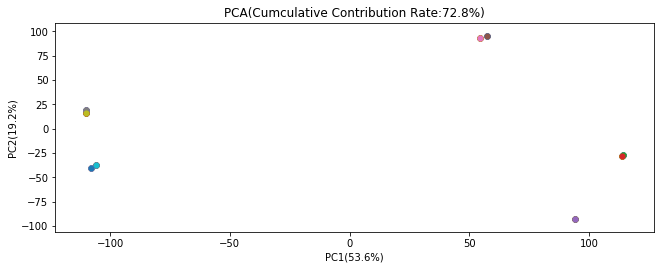

In [60]:
import os
import shutil
import csv
import pandas as pd
import sys
import numpy as np
import os
import shutil
import csv
import pandas as pd
import sys
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pyclustering
from pyclustering.cluster import xmeans
import datetime

#ファイルと回数の指定
df=pd.read_csv("/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv")
trial = 9

#データ保存用フォルダーの指定
dire="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"
new_folder=dire+"/2D-PCA-Xmeans"
assurance = os.path.exists(new_folder)
if assurance==True :
    dt_today = datetime.date.today()
    dt_now = datetime.datetime.now()
    dt_now =str(dt_now.hour)+"-"+str(dt_now.minute)+"-"+str(dt_now.second)
    new_folder=new_folder+"_"+str(dt_today)+"-"+dt_now
    print("----A new folder has been created----")
    print(new_folder)
else:
    print("----A new folder has been created in "+dire+"----")
os.mkdir(new_folder)

#ファイル読み込み→２次元PCA
df=df.set_index("Unnamed: 0")
x = df.iloc[:,0:].values
pca = PCA(n_components=2)
xt = pca.fit_transform(x)
[pc1, pc2] = pca.explained_variance_ratio_
PC1 = 100*(round(pc1, 3))
PC2 = 100*(round(pc2, 3))
TPC = PC1+PC2
xlabel = ("PC1(" + str(PC1) + "%)")
ylabel = ("PC2(" + str(PC2) + "%)")
title = ("PCA(Cumculative Contribution Rate:" + str(TPC) + "%)")
Pc1=PC1/5
Pc2=PC2/5
fig = plt.figure(figsize=(Pc1, Pc2))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

#指定回数分のX-meansを実行
t=trial+1
for i in range(1, t):
    init_center = pyclustering.cluster.xmeans.kmeans_plusplus_initializer(xt, 2).initialize()
    xm = pyclustering.cluster.xmeans.xmeans(xt, init_center, ccore=False)
    xm.process()
    clusters = xm.get_clusters()
    df2=df.iloc[:, 0:2]
    cl=df2.iloc[:, 1]
    df2["cluster"]=cl
    loc=len(df2.columns.values)-1
    len0=len(clusters)
    l=len0+1
    for j in range(1, l):
        clm=j-1
        list1=clusters[clm]
        l1=len(list1)+1
        for k in range(1, l1):
            nn=int(list1[k-1])
            df2.iloc[nn, loc]=j
    xt2=xt[:, 0]
    xt3=xt[:, 1]
    df2.iloc[:, 0]=xt2
    df2.iloc[:, 1]=xt3
    color=["b", "r", "g", "k", "c", "m", "y", "w"]
    df2=df2.values
    for j in range(1, l):
        clm=j-1
        df3=df2[df2[:, 2]==j, :]
        plt.scatter(df3[:, 0], df3[:, 1], linewidths=0.1)
    figpath=new_folder+"/2D-PCA-Xmeans_"+str(i)+".png"
    fig.savefig(figpath, bbox_inches="tight", pad_inches=0.05)
print("----2D-PCA-Xmeans completed----")

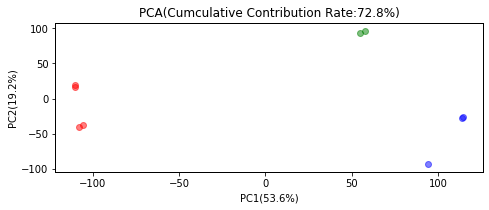

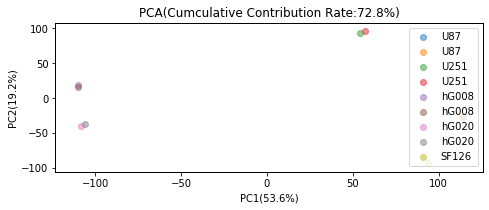

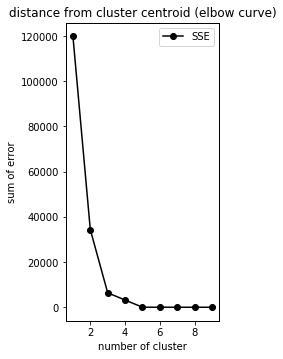

In [274]:
import os
import shutil
import csv
import pandas as pd
import sys
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.linewidth'] = 1

dataframe = pd.read_csv("/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv")
dataframe = dataframe.set_index("Unnamed: 0")
x = dataframe.iloc[:,0:].values
pca = PCA(n_components=2)
xt = pca.fit_transform(x)

km =KMeans(n_clusters=3, random_state=10)
ykm = km.fit_predict(xt)

[pc1, pc2] = pca.explained_variance_ratio_

PC1 = 100*(round(pc1, 3))
PC2 = 100*(round(pc2, 3))
TPC = PC1+PC2

xlabel = ("PC1(" + str(PC1) + "%)")
ylabel = ("PC2(" + str(PC2) + "%)")
title = ("PCA(Cumculative Contribution Rate:" + str(TPC) + "%)")

Pc1=PC1/7
Pc2=PC2/7

figure=plt.figure(figsize=(Pc1,Pc2))
plt.subplot(1, 1, 1)
plt.scatter(xt[ykm==0, 0], xt[ykm==0, 1], color='red', linewidths=1, alpha=0.5)
plt.scatter(xt[ykm==1, 0], xt[ykm==1, 1], color='blue', linewidths=1, alpha=0.5)
plt.scatter(xt[ykm==2, 0], xt[ykm==2, 1], color='green', linewidths=1, alpha=0.5)
plt.scatter(xt[ykm==3, 0], xt[ykm==3, 1], color='k', linewidths=1, alpha=0.5)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show()
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/PCA_cluster3.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

figure=plt.figure(figsize=(Pc1,Pc2))
plt.subplot(1, 1, 1)
for i in range(0, len(df.index)):
    plt.scatter(xt[i, 0], xt[i, 1], label=df.index[i], linewidths=1, alpha=0.5)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show()
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/PCA.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

mcn=9
sse=np.zeros((mcn,))
se=np.zeros((mcn,))
for i in range(mcn):
    cn=i+1
    kms=KMeans(n_clusters=cn)
    pred=kms.fit_predict(xt)
    tf=kms.transform(xt)
    dist=np.zeros((xt.shape[0]))
    for index in range(len(tf)):
        dist[index]=tf[index,pred[index]]
    se[i]=np.sum(dist)
    sse[i]=np.sum(dist**2)
    
figure=plt.figure(figsize=(Pc2,2*Pc2))
plt.title('distance from cluster centroid (elbow curve)')
plt.xlabel('number of cluster')
plt.ylabel('sum of error')
ax=np.array([[1],[2], [3], [4], [5], [6], [7], [8], [9]])
plt.plot(ax, sse, 'ko-', label='SSE')
plt.legend()
plt.show()
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/PCA_Elbow_Plot.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

gene name for x axisHK1
gene name for y axisHK2


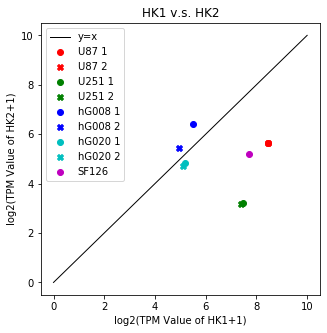

In [63]:
import os
import shutil
import csv
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepath="/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv"
xaxis=input("gene name for x axis")
yaxis=input("gene name for y axis")
dfica= pd.read_csv(filepath)
dfica=dfica.set_index("Unnamed: 0")
xica=dfica[xaxis]
yica=dfica[yaxis]
dfica=dfica.iloc[:, 0:2]
dfica.iloc[:, 0]=xica
dfica.iloc[:, 1]=yica
x = np.linspace(0, 10, 1000)
y=x

figure=plt.figure(figsize=(5,5))
plt.scatter(dfica.iloc[0, 0], dfica.iloc[0, 1], c="r", linewidths=1, label="U87 1")
plt.scatter(dfica.iloc[1, 0], dfica.iloc[1, 1], c="r", linewidths=1, marker="X", label="U87 2")
plt.scatter(dfica.iloc[2, 0], dfica.iloc[2, 1], c="g", linewidths=1, label="U251 1")
plt.scatter(dfica.iloc[3, 0], dfica.iloc[3, 1], c="g", linewidths=1, marker="X", label="U251 2")
plt.scatter(dfica.iloc[4, 0], dfica.iloc[4, 1], c="b", linewidths=1, label="hG008 1")
plt.scatter(dfica.iloc[5, 0], dfica.iloc[5, 1], c="b", linewidths=1, marker="X", label="hG008 2")
plt.scatter(dfica.iloc[6, 0], dfica.iloc[6, 1], c="c", linewidths=1, label="hG020 1")
plt.scatter(dfica.iloc[7, 0], dfica.iloc[7, 1], c="c", linewidths=1, marker="X", label="hG020 2")
plt.scatter(dfica.iloc[8, 0], dfica.iloc[8, 1], c="m", linewidths=1, label="SF126")
xlabel = ("log2(TPM Value of " + xaxis+"+1)")
ylabel = ("log2(TPM Value of " + yaxis+"+1)")
title = (xaxis + " v.s. " +yaxis)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x, y, label='y=x', color='k', linewidth=1, linestyle='solid')
plt.legend(loc="upper left", fontsize=10)
plt.show()
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/ICA_"+xaxis+"-"+yaxis+".png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)


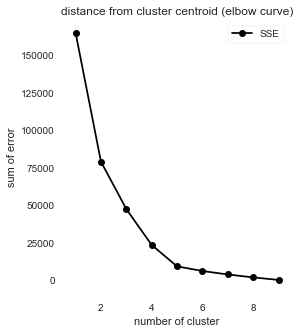

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import csv
import pandas as pd
import sys
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

mcn=9
df=pd.read_csv("/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv")
df=df.set_index("Unnamed: 0")
da=df.iloc[:,0:].values
sse=np.zeros((mcn,))

for i in range(mcn):
    cn=i+1
    kms=KMeans(n_clusters=cn)
    pred=kms.fit_predict(da)
    tf=kms.transform(da)
    dist=np.zeros((da.shape[0]))
    for index in range(len(tf)):
        dist[index]=tf[index,pred[index]]
    sse[i]=np.sum(dist**2)
    
figure=plt.figure(figsize=(4,5))
plt.title('distance from cluster centroid (elbow curve)')
plt.xlabel('number of cluster')
plt.ylabel('sum of error')
ax=np.array([[1],[2], [3], [4], [5], [6], [7], [8], [9]])
plt.plot(ax, sse, 'ko-', label='SSE')
plt.legend()
plt.show()
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/Elbow_Plot.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

In [53]:
filepath="/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv"
df= pd.read_csv(filepath)
df=df.set_index("Unnamed: 0")
from scipy.cluster.hierarchy import dendrogram, linkage

plt.rcParams['axes.linewidth'] = 1
x = df.iloc[:,0:].values
xew=linkage(x, metric="euclidean", method="ward")

figure=plt.figure(figsize=(4,5))
dendrogram(xew, labels=df.index)
plt.title('Euclidean Distance', size=15)
plt.xlabel('Sample', size=10)
plt.ylabel('Threshold', size=10)
plt.tick_params(labelsize=8)
plt.show()
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/dendrogram.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

ncd=len(df)
nsd=len(df)
df1=pd.DataFrame(xew)

print(xew)
x1=[]
y1=[]
x2=[]
y2=[]
for i in df1.index:
    n1=int(df1.iloc[i][0])
    n2=int(df1.iloc[i][1])
    val=df1.iloc[i][2]
    ncd -= 1
    x1.append(val)
    x2.append(val)
    y1.append(ncd)
    y2.append(float(nsd)/float(ncd))
figure=plt.figure(figsize=(4,5))
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'ko-')
plt.title('Threshold Dependency of Hierarchical Clustering')
plt.ylabel('Num of Clusters')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'ko-')
plt.xlabel('Threshold')
plt.ylabel('Ave Cluster Size')
plt.show()
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/dendogram_detail.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 288x360 with 0 Axes>

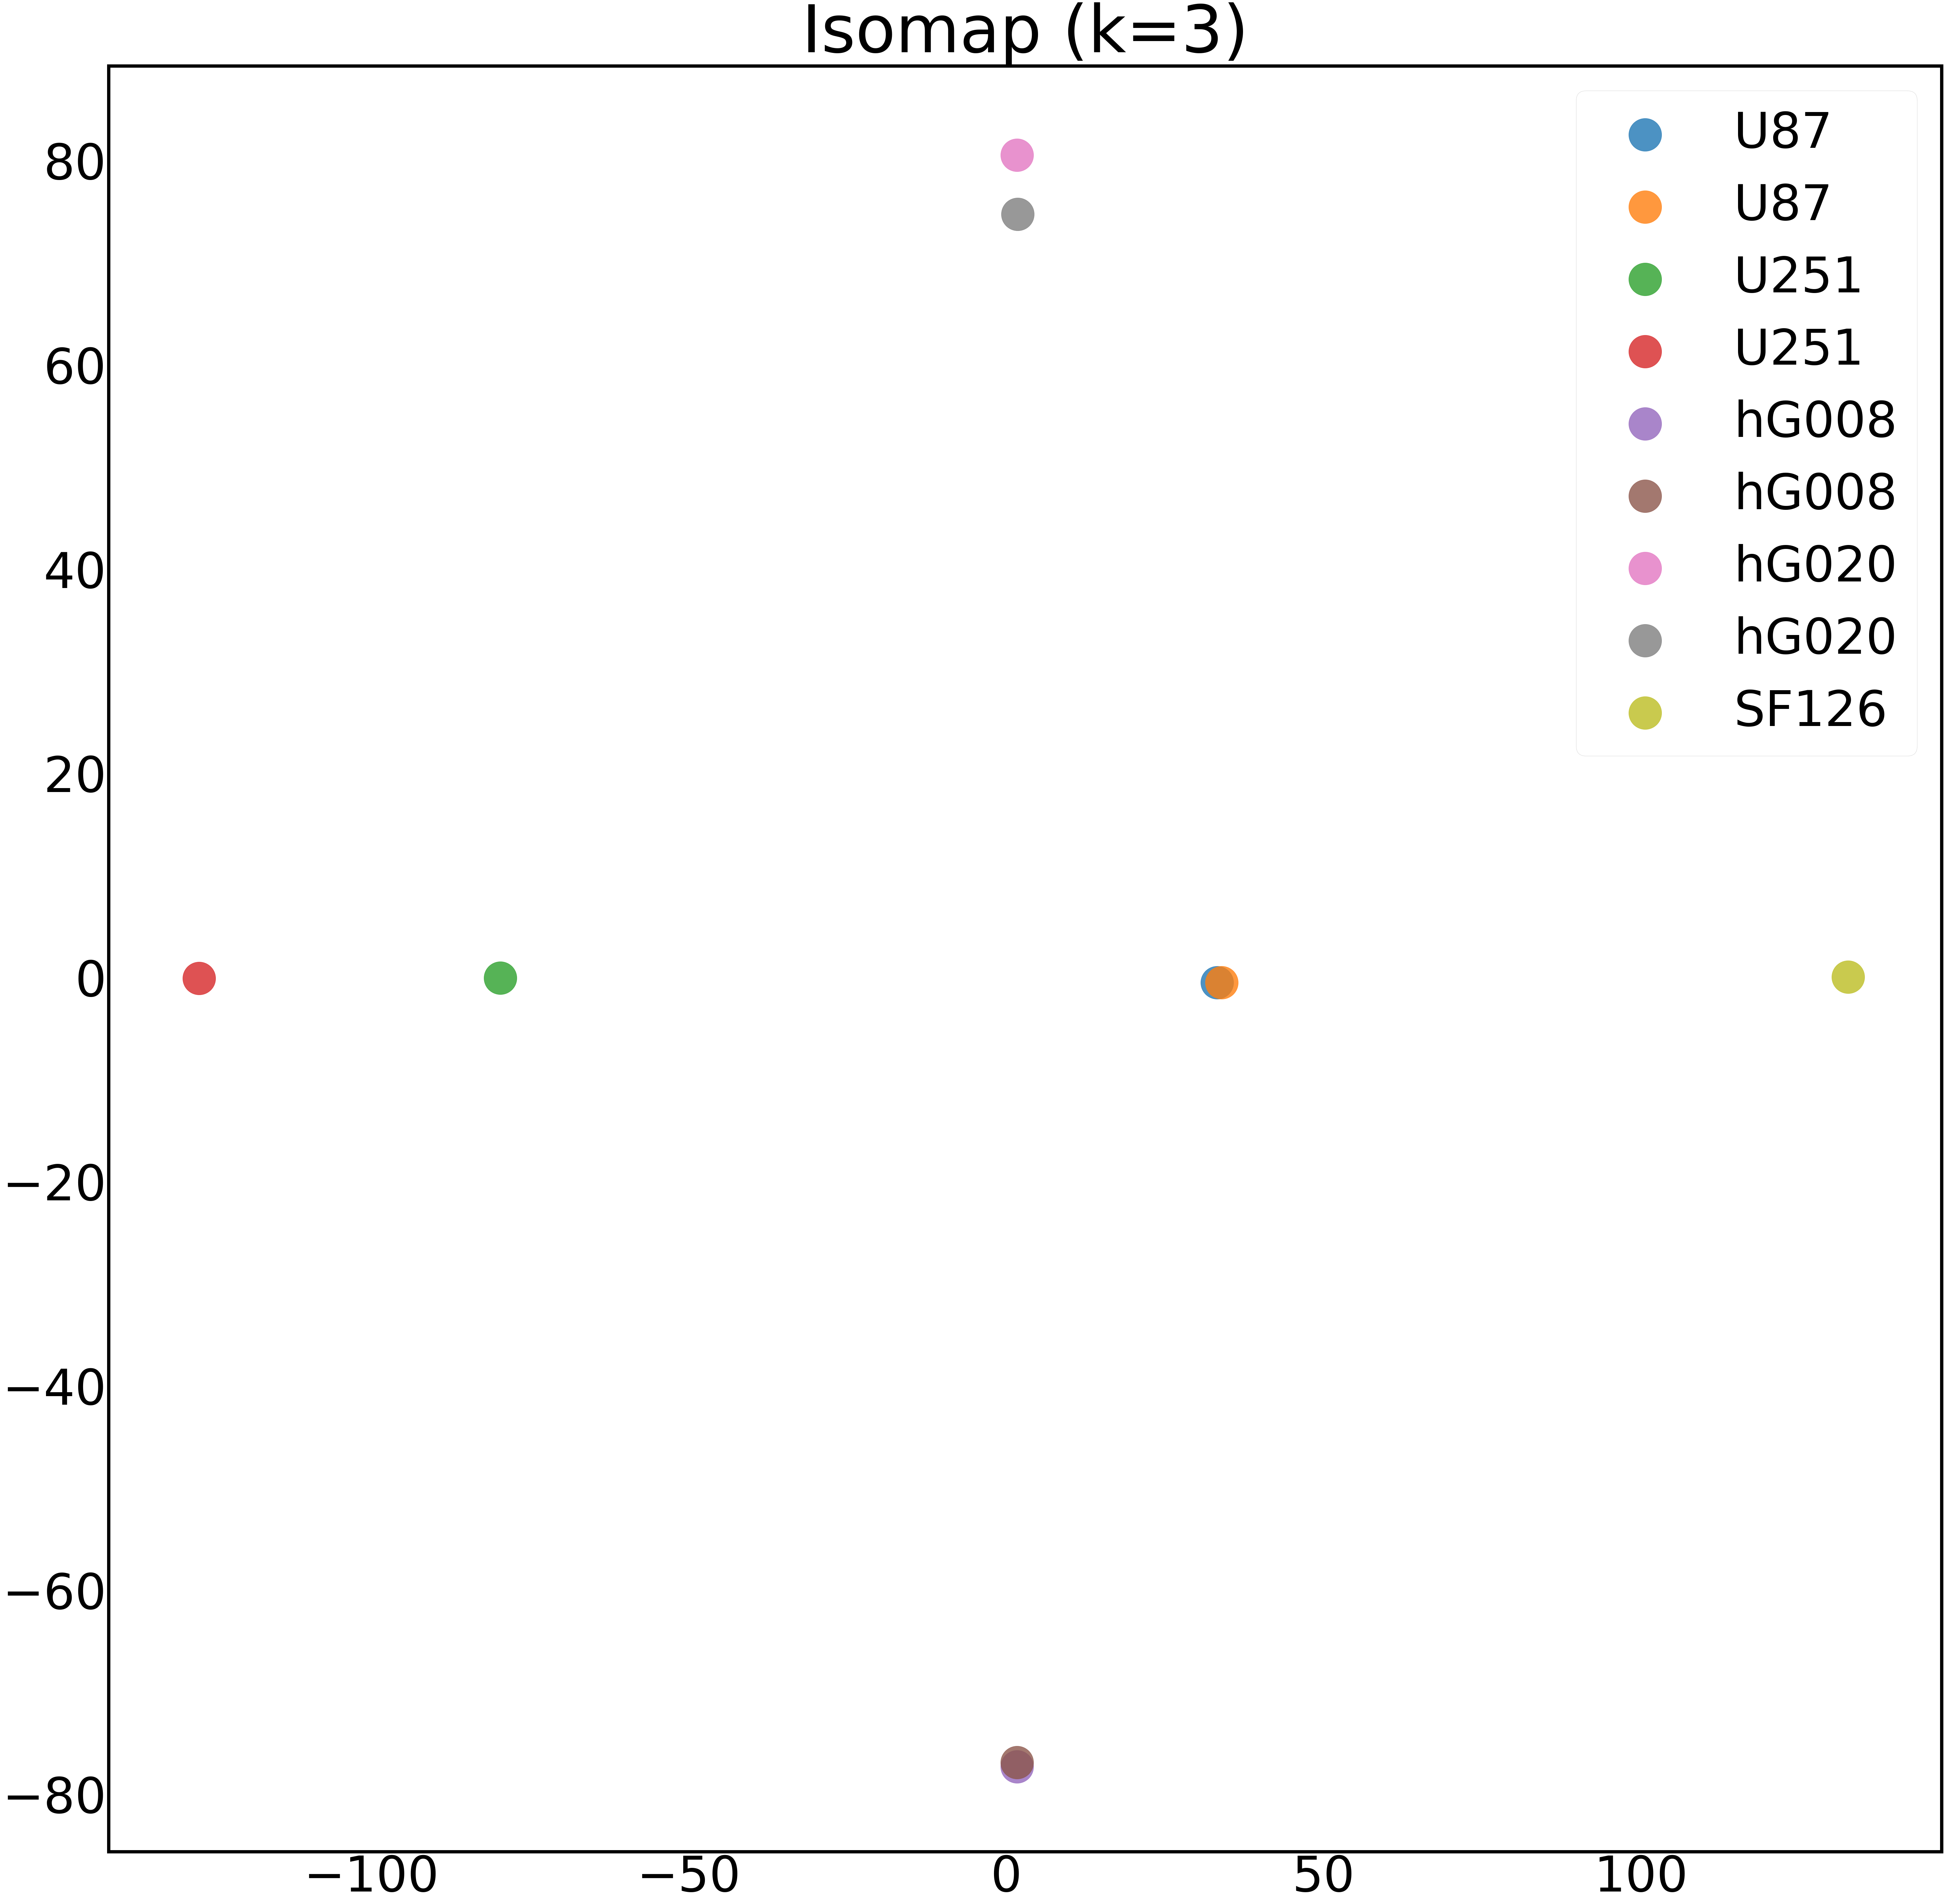

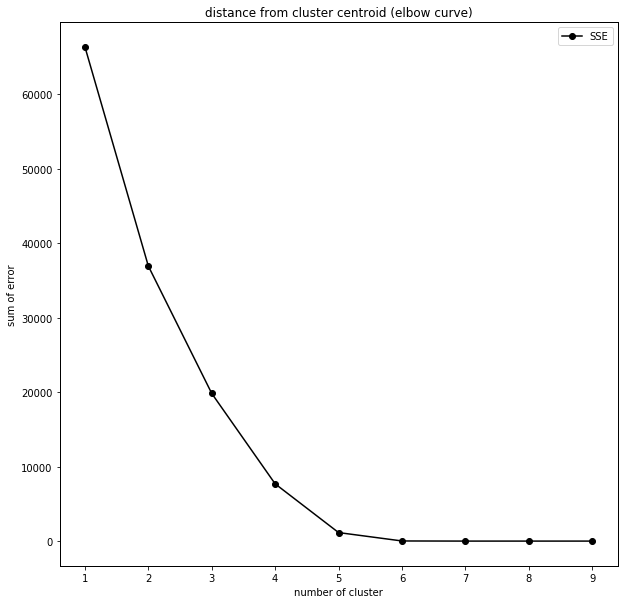

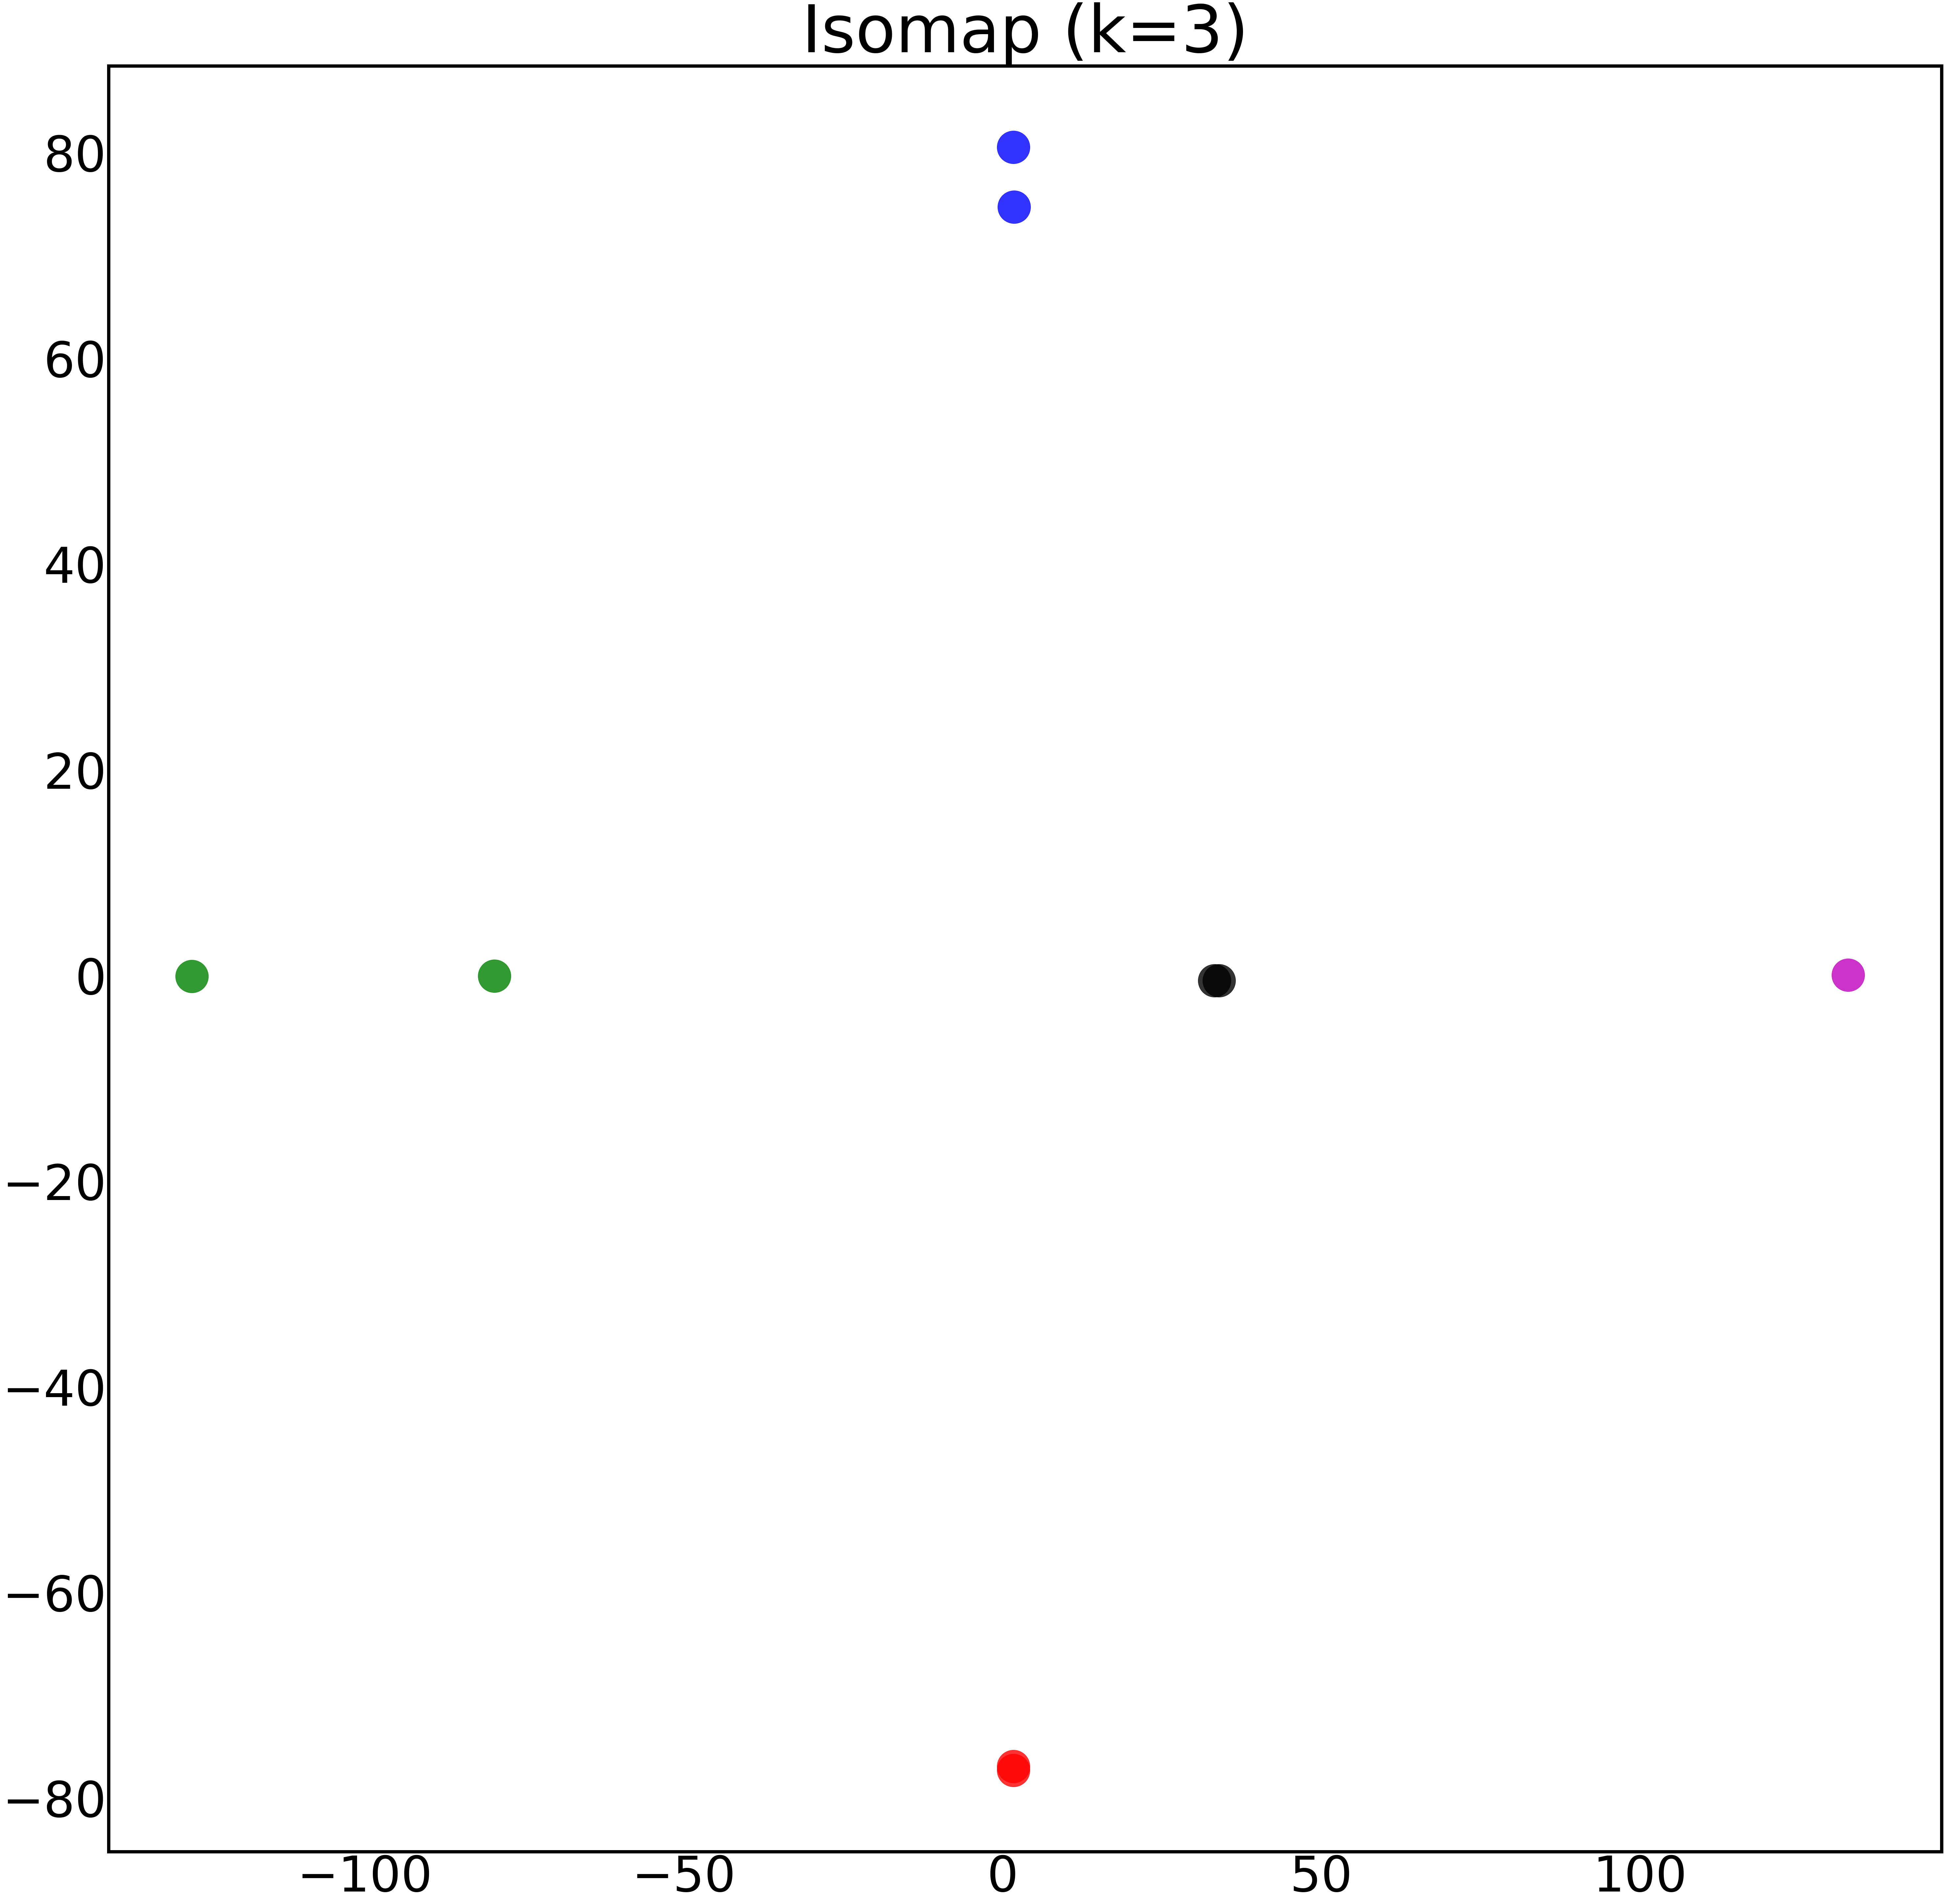

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

filepath="/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv"
df= pd.read_csv(filepath)
df=df.set_index("Unnamed: 0")
x = dataframe.iloc[:,0:].values
n_neighbors=3

xi = manifold.Isomap(n_neighbors, n_components=2).fit_transform(x)
figure=plt.figure(figsize=(100,100))
plt.rcParams['axes.linewidth'] = 10

for i in range(0, len(df.index)):
    plt.scatter(xi[i, 0], xi[i, 1], label=df.index[i], s=10000, alpha=0.8)
plt.legend(loc="upper right", fontsize=150)
plt.title('Isomap (k=3)', size=200)
plt.tick_params(labelsize=150)
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results/Isomap.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

mcn=9
sse=np.zeros((mcn,))
se=np.zeros((mcn,))
for i in range(mcn):
    cn=i+1
    kms=KMeans(n_clusters=cn)
    pred=kms.fit_predict(xi)
    tf=kms.transform(xi)
    dist=np.zeros((xi.shape[0]))
    for index in range(len(tf)):
        dist[index]=tf[index,pred[index]]
    se[i]=np.sum(dist)
    sse[i]=np.sum(dist**2)
figure=plt.figure(figsize=(10,10))
plt.rcParams['axes.linewidth'] = 1
plt.title('distance from cluster centroid (elbow curve)')
plt.xlabel('number of cluster')
plt.ylabel('sum of error')
ax=np.array([[1],[2], [3], [4], [5], [6], [7], [8], [9]])
plt.plot(ax, sse, 'ko-', label='SSE')
plt.legend()
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/Isomap_Elbow_Plot.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

km =KMeans(n_clusters=5, random_state=10)
ykm = km.fit_predict(xi)
figure=plt.figure(figsize=(100,100))
plt.rcParams['axes.linewidth'] = 10
plt.scatter(xi[ykm==0, 0], xi[ykm==0, 1], color='red', linewidths=1, alpha=0.8, s=10000)
plt.scatter(xi[ykm==1, 0], xi[ykm==1, 1], color='blue', linewidths=1, alpha=0.8, s=10000)
plt.scatter(xi[ykm==2, 0], xi[ykm==2, 1], color='green', linewidths=1, alpha=0.8, s=10000)
plt.scatter(xi[ykm==3, 0], xi[ykm==3, 1], color='k', linewidths=1, alpha=0.8, s=10000)
plt.scatter(xi[ykm==4, 0], xi[ykm==4, 1], color='m', linewidths=1, alpha=0.8, s=10000)
plt.title('Isomap (k=3)', size=200)
plt.tick_params(labelsize=150)
plt.rcParams['axes.linewidth'] = 10
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/Isomap_cluster5.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)
plt.rcParams['axes.linewidth'] = 1


/Users/yujiokano/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


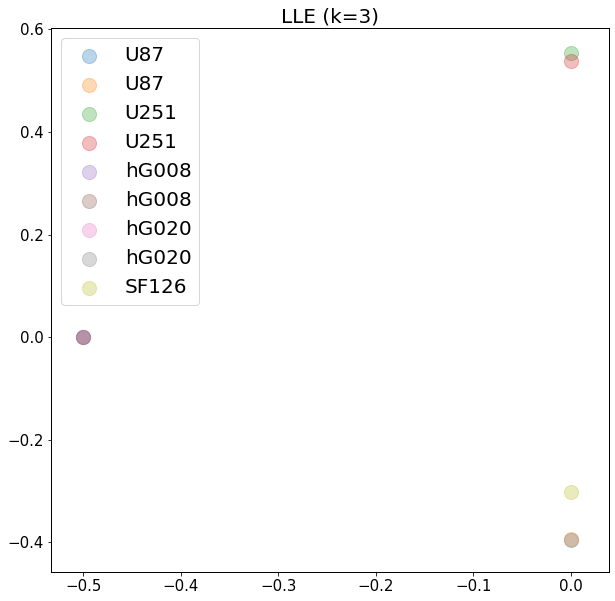

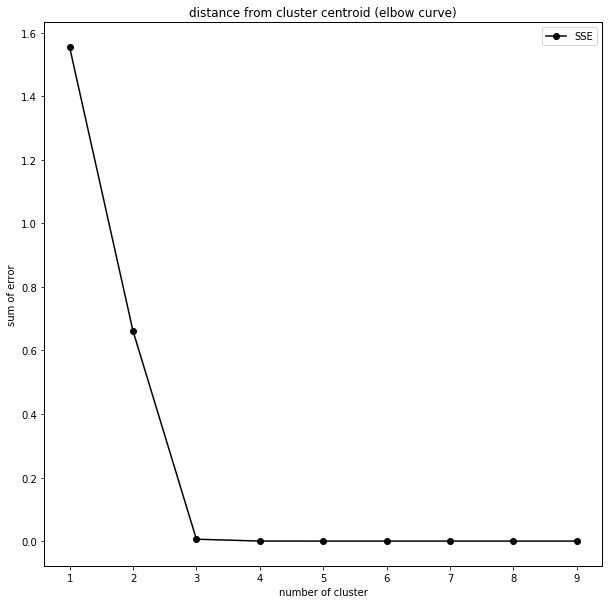

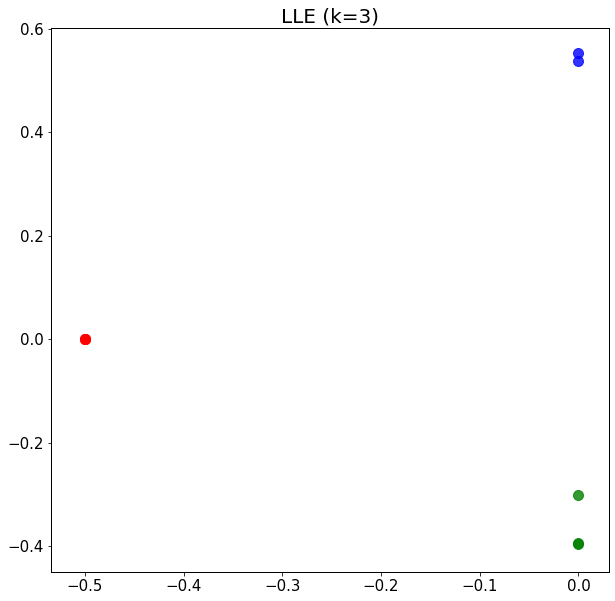

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding

filepath="/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv"
df= pd.read_csv(filepath)
df=df.set_index("Unnamed: 0")
x = dataframe.iloc[:,0:].values
n_neighbors=3

xl = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2).fit_transform(x)
figure=plt.figure(figsize=(10,10))
plt.rcParams['axes.linewidth'] = 1

for i in range(0, len(df.index)):
    plt.scatter(xl[i, 0], xl[i, 1], s=200, label=df.index[i], alpha=0.3)
plt.legend(loc="upper left", fontsize=20)
plt.title('LLE (k=3)', size=20)
plt.tick_params(labelsize=15)
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results/LLE.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

mcn=9
sse=np.zeros((mcn,))
se=np.zeros((mcn,))
for i in range(mcn):
    cn=i+1
    kms=KMeans(n_clusters=cn)
    pred=kms.fit_predict(xl)
    tf=kms.transform(xl)
    dist=np.zeros((xl.shape[0]))
    for index in range(len(tf)):
        dist[index]=tf[index,pred[index]]
    se[i]=np.sum(dist)
    sse[i]=np.sum(dist**2)
figure=plt.figure(figsize=(10,10))
plt.rcParams['axes.linewidth'] = 1
plt.title('distance from cluster centroid (elbow curve)')
plt.xlabel('number of cluster')
plt.ylabel('sum of error')
ax=np.array([[1],[2], [3], [4], [5], [6], [7], [8], [9]])
plt.plot(ax, sse, 'ko-', label='SSE')
plt.legend()
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/LLE_Elbow_Plot.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)

km =KMeans(n_clusters=3, random_state=10)
ykm = km.fit_predict(xl)
figure=plt.figure(figsize=(10,10))
plt.rcParams['axes.linewidth'] = 1
plt.scatter(xl[ykm==0, 0], xl[ykm==0, 1], color='red', linewidths=1, alpha=0.8, s=100)
plt.scatter(xl[ykm==1, 0], xl[ykm==1, 1], color='blue', linewidths=1, alpha=0.8, s=100)
plt.scatter(xl[ykm==2, 0], xl[ykm==2, 1], color='green', linewidths=1, alpha=0.8, s=100)
plt.scatter(xl[ykm==3, 0], xl[ykm==3, 1], color='k', linewidths=1, alpha=0.8, s=100)
plt.title('LLE (k=3)', size=20)
plt.tick_params(labelsize=15)
figpath="/Users/yujiokano/Desktop/glioma_results/RNAseq_results"+"/LLE_cluster3.png"
figure.savefig(figpath, bbox_inches="tight", pad_inches=0.05)
plt.rcParams['axes.linewidth'] = 1

In [279]:
import pandas as pd
from pandas_profiling import ProfileReport
df = pd.read_csv("/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv")
ProfileReport(df)

AbstractMethodError: This method must be defined in the concrete class type

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

NameError: name 'df' is not defined

In [58]:
df = pd.read_csv("/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv")
df=df.set_index("Unnamed: 0")
profile=ProfileReport(df, minimal=True)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

KeyboardInterrupt: 

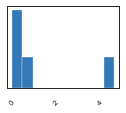

In [59]:
profile.to_file("/Users/yujiokano/Desktop/sample_vs_genes.html")

In [61]:
df = pd.read_csv("/Users/yujiokano/Desktop/2020-07-30-RNAseqresults/integrated_results_Condition/sample_vs_gene.csv")
df=df.set_index("Unnamed: 0")
cores=df.corr()
cores.head()
cores.to_csv("/Users/yujiokano/Desktop/cores.csv")